In [4]:
import pandas as pd

In [5]:
#reading data set
all_data_genes = pd.read_csv(r'C:\Users\javte\Documents\SSEF project\datasets\full_matrix\matrix_logCPMrmBatch_20221207.csv', index_col=[0])
all_data_genes = all_data_genes.transpose()
all_data_condition = pd.read_csv(r'C:\Users\javte\Documents\SSEF project\datasets\full_matrix\selected_metadat_20221128.csv', index_col=[0])

In [6]:
#dictionary mapping subtype to number
map = {"Healthy": '0', "LumA" : '1', "LumB" : '2', "Her2": '3', "Basal" : '4', "Normal": '5'}

In [7]:
#dependent variable
y=all_data_condition.replace({'pam50':map}).pam50

In [8]:
#check that genes are the same
if list(all_data_genes.index) == list(all_data_condition.index):
    # set X = genes
    X = all_data_genes

In [9]:
y.value_counts()

1    560
2    209
4    188
0    112
3     82
5     39
Name: pam50, dtype: int64

In [10]:
from sklearn.model_selection import cross_validate
def cross_validation(model, _X, _y, _cv):
    _scoring = ['accuracy', 'precision', 'recall', 'f1']
    results = cross_validate(estimator=model,
                               X=_X,
                               y=_y,
                               cv=_cv,
                               scoring=_scoring,
                               return_train_score=True)
      
    return {"Training Accuracy scores": results['train_accuracy'],
              "Mean Training Accuracy": results['train_accuracy'].mean()*100,
              "Training Precision scores": results['train_precision'],
              "Mean Training Precision": results['train_precision'].mean(),
              "Training Recall scores": results['train_recall'],
              "Mean Training Recall": results['train_recall'].mean(),
              "Training F1 scores": results['train_f1'],
              "Mean Training F1 Score": results['train_f1'].mean(),
              "Validation Accuracy scores": results['test_accuracy'],
              "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
              "Validation Precision scores": results['test_precision'],
              "Mean Validation Precision": results['test_precision'].mean(),
              "Validation Recall scores": results['test_recall'],
              "Mean Validation Recall": results['test_recall'].mean(),
              "Validation F1 scores": results['test_f1'],
              "Mean Validation F1 Score": results['test_f1'].mean()
              }

In [11]:
def plot_result(x_label, y_label, plot_title, train_data, val_data):
        # Set size of plot
        plt.figure(figsize=(12,6))
        labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold"]
        X_axis = np.arange(len(labels))
        ax = plt.gca()
        plt.ylim(0.40000, 1)
        plt.bar(X_axis-0.2, train_data, 0.4, color='blue', label='Training')
        plt.bar(X_axis+0.2, val_data, 0.4, color='red', label='Validation')
        plt.title(plot_title, fontsize=30)
        plt.xticks(X_axis, labels)
        plt.xlabel(x_label, fontsize=14)
        plt.ylabel(y_label, fontsize=14)
        plt.legend()
        plt.grid(True)
        plt.show()

In [18]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy
rfc = RandomForestClassifier(random_state=77, n_estimators=1000, max_depth=5, n_jobs=-1)
boruta_selector = BorutaPy(estimator=rfc, n_estimators=1000, verbose=5, random_state=77, max_iter=100, alpha=0.0001)
boruta_result = cross_validation(boruta_selector, np.array(X), np.array(y), 5)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	26991
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	26991
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	26991
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	26991
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	26991
Rejected: 	0


KeyboardInterrupt: 

In [8]:
#smote to resample dataset
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=77)
X, y = smote.fit_resample(X_train, y_train)

In [9]:
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(X)

In [10]:
y.value_counts()

2    448
1    448
3    448
5    448
0    448
4    448
Name: pam50, dtype: int64

In [11]:
principal_df = pd.DataFrame(data = principalComponents, columns = ["PC"+str(i)for i in range(1,len(principalComponents)+1)])

In [12]:
pam50 = y.to_list()
principal_df['pam50']=pam50

<Figure size 640x480 with 0 Axes>

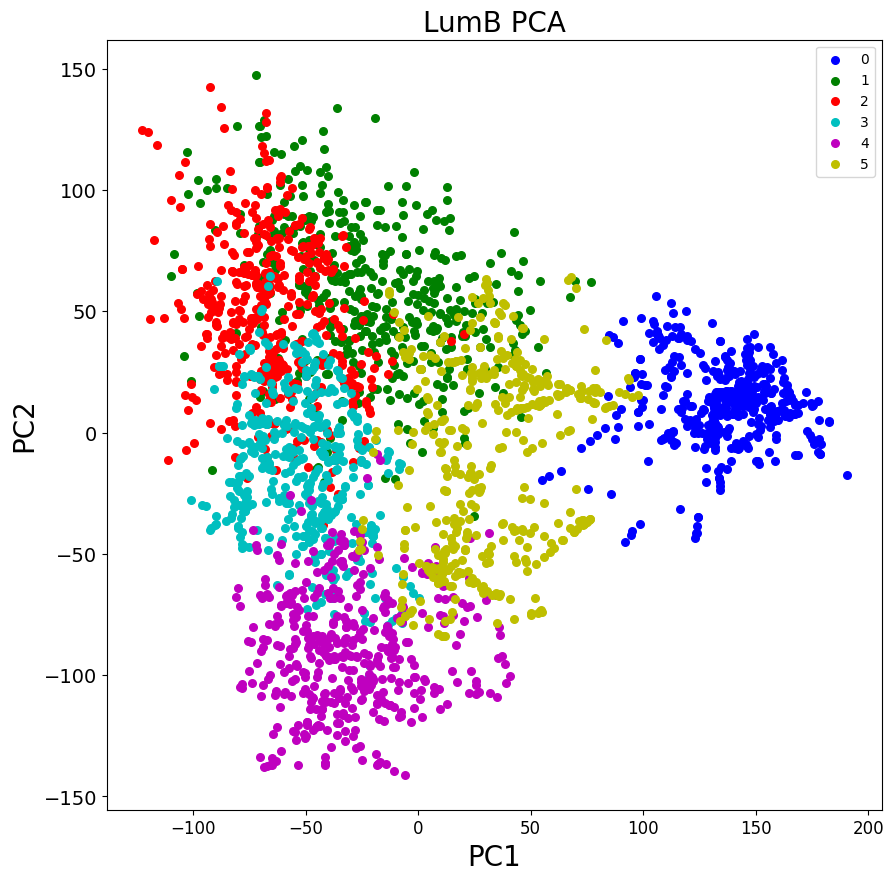

In [13]:
import matplotlib.pyplot as plt
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('PC1',fontsize=20)
plt.ylabel('PC2',fontsize=20)
plt.title("LumB PCA",fontsize=20)
targets = ['0', '1', '2', '3', '4', '5']
colours = ['b', 'g', 'r', 'c', 'm', 'y']
#colour code points according to pam50
for target, colour in zip(targets,colours):
    index = principal_df.pam50 == target
    plt.scatter(principal_df.loc[index, 'PC1']
               , principal_df.loc[index, 'PC2'], c = colour, s = 30)
#plot legend
plt.legend(targets,prop={'size': 10})

In [46]:
#random forest model
from sklearn.ensemble import RandomForestClassifier
rf_all_genes = RandomForestClassifier(random_state=77, n_estimators=5000, max_depth=5, verbose=1, n_jobs=8)
rf_all_genes.fit(X, y)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.7s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    3.5s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    8.5s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:   16.3s
[Parallel(n_jobs=8)]: Done 1234 tasks      | elapsed:   26.7s
[Parallel(n_jobs=8)]: Done 1784 tasks      | elapsed:   40.0s
[Parallel(n_jobs=8)]: Done 2434 tasks      | elapsed:   56.0s
[Parallel(n_jobs=8)]: Done 3184 tasks      | elapsed:  1.3min
[Parallel(n_jobs=8)]: Done 4034 tasks      | elapsed:  1.7min
[Parallel(n_jobs=8)]: Done 4984 tasks      | elapsed:  2.1min
[Parallel(n_jobs=8)]: Done 5000 out of 5000 | elapsed:  2.1min finished


RandomForestClassifier(max_depth=5, n_estimators=5000, n_jobs=8,
                       random_state=77, verbose=1)

In [48]:
#evaluation of random forest model
from sklearn.metrics import accuracy_score
accuracy_score(y_test, rf_all_genes.predict(X_test))

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 1234 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 1784 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 2434 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 3184 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 4034 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 4984 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done 5000 out of 5000 | elapsed:    0.6s finished


0.819327731092437

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 1234 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 1784 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 2434 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 3184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 4034 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 4984 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done 5000 out of 5000 | elapsed:    0.6s finished


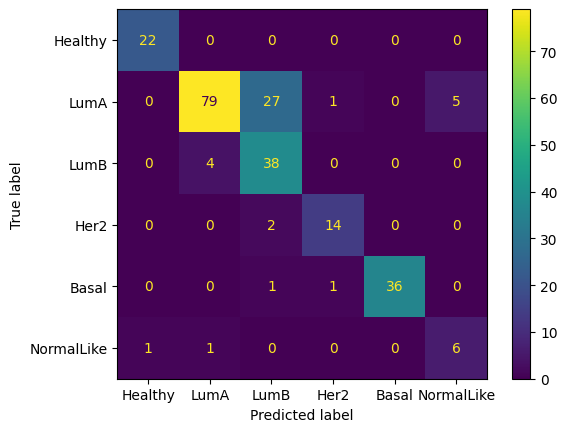

In [49]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, rf_all_genes.predict(X_test))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Healthy', 'LumA', 'LumB', 'Her2', 'Basal', 'NormalLike'])
import matplotlib.pyplot as plt
cm_display.plot()
plt.show()

In [27]:
selected_rf_features = pd.DataFrame({'Feature':list(X_train.columns),'Ranking':boruta_selector.ranking_}).query('Ranking == 1')
selected_rf_features.to_csv(r'C:\Users\javte\Documents\SSEF project\results\multiclass\boruta_genes.csv')

In [28]:
X_important_train = boruta_selector.transform(np.array(X))
X_important_test = boruta_selector.transform(np.array(X_test))

In [33]:
rf_boruta = RandomForestClassifier(random_state=77, n_estimators=5000, max_depth=5, verbose=1, n_jobs=-1)
rf_boruta.fit(X_important_train, y)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:   20.1s
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:   26.1s
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:   33.2s
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed:   41.3s
[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed:   41.4s finished


RandomForestClassifier(max_depth=5, n_estimators=5000, n_jobs=-1,
                       random_state=77, verbose=1)

In [34]:
accuracy_score(y_test, rf_boruta.predict(X_important_test))

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 1234 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 1784 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 2434 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 3184 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 4034 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 4984 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 5000 out of 5000 | elapsed:    0.5s finished


0.8151260504201681

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 1234 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 1784 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 2434 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 3184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 4034 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done 4984 tasks      | elapsed:    0.9s
[Parallel(n_jobs=8)]: Done 5000 out of 5000 | elapsed:    0.9s finished


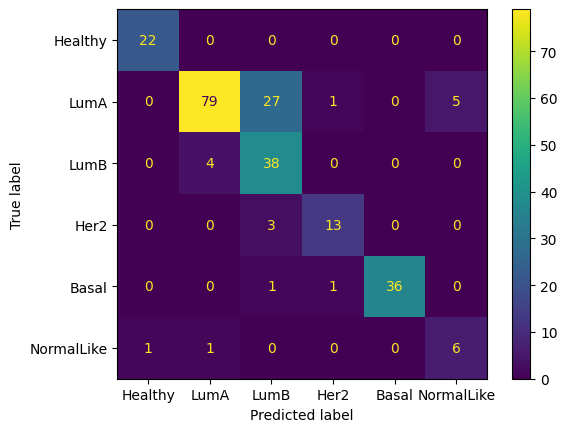

In [37]:
confusion_matrix = metrics.confusion_matrix(y_test, rf_boruta.predict(X_important_test))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Healthy', 'LumA', 'LumB', 'Her2', 'Basal', 'NormalLike'])
cm_display.plot()
plt.show()

In [40]:
feat_importances = pd.Series(rf_boruta.feature_importances_, index=selected_rf_features['Feature'])

In [44]:
feat_importances.sort_values(ascending=False).to_csv(r'C:\Users\javte\Documents\SSEF project\results\multiclass\feature importance.csv')